In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [84]:
dirname=os.getcwd()
path_parent = os.path.dirname(os.getcwd())
print(path_parent)

C:\Users\andre\OneDrive\Desktop\USC\DSCI550\Project


In [85]:
rb_df = pd.read_csv(os.path.join(path_parent, "Data\\Clean_Data\\rbs.csv"))

In [86]:
rb_df['probowl']=0

In [87]:
for index, row in rb_df.iterrows():
    if "*" in row['Player']:
        row['probowl'] = 1
        rb_df.loc[index, 'probowl'] = 1

## Running Back Random Forrest (All Variables) [1]

In [88]:
rb_df_features = rb_df.iloc[:,8:]
rb_df_features = rb_df_features.drop(['Player*','Year','PlayerYearTm*','Pos*'], axis=1)
rb_df_features.head()

,GS,Rush_Att,Rush_Yds,Rush_TD,Rush_1D,Rush_Lng,Rush_Y/A,Rush_Y/G,Rush_Fmb,Rec_Tgt,...,Pass_QBR,Pass_Sk,Pass_Yds.1,Pass_Sk%,Pass_NY/A,Pass_ANY/A,Pass_4QC,Pass_GWD,QBrec,probowl
0,16,403,1509,14,78,35,3.7,94.3,5,65,...,0.0,0,0,0.0,0.0,0.0,0,0,0,1
1,16,387,1709,13,100,30,4.4,106.8,5,87,...,0.0,0,0,0.0,0.0,0.0,0,0,0,1
2,16,355,1341,8,72,30,3.8,83.8,1,19,...,0.0,0,0,0.0,0.0,-22.5,0,0,0,0
3,16,339,1184,10,66,34,3.5,74.0,4,48,...,0.0,0,0,0.0,0.0,0.0,0,0,0,0
4,15,332,1318,11,72,50,4.0,87.9,4,49,...,0.0,0,0,0.0,0.0,0.0,0,0,0,1


In [89]:
rb_df_features.dtypes

GS              int64
Rush_Att        int64
Rush_Yds        int64
Rush_TD         int64
Rush_1D         int64
Rush_Lng        int64
Rush_Y/A      float64
Rush_Y/G      float64
Rush_Fmb        int64
Rec_Tgt         int64
Rec_Rec         int64
Rec_Ctch%      object
Rec_Yds         int64
Rec_Y/R       float64
Rec_TD          int64
Rec_1D          int64
Rec_Lng         int64
Rec_Y/Tgt     float64
Rec_R/G       float64
Rec_Y/G       float64
Rec_Fmb         int64
Pass_Cmp        int64
Pass_Att        int64
Pass_Cmp%     float64
Pass_Yds        int64
Pass_TD         int64
Pass_TD%      float64
Pass_Int        int64
Pass_Int%       int64
Pass_1D         int64
Pass_Lng        int64
Pass_Y/A      float64
Pass_AY/A     float64
Pass_Y/C      float64
Pass_Y/G      float64
Pass_Rate     float64
Pass_QBR      float64
Pass_Sk         int64
Pass_Yds.1      int64
Pass_Sk%      float64
Pass_NY/A     float64
Pass_ANY/A    float64
Pass_4QC        int64
Pass_GWD        int64
QBrec           int64
probowl   

In [90]:
#Change all % columns to float, then classifier will run.
rb_df_features['Rec_Ctch%'] = rb_df_features['Rec_Ctch%'].str.rstrip("%").astype(float)/100

In [91]:
train1, test1 = train_test_split(rb_df_features, test_size=0.333, stratify=rb_df_features['probowl'])

In [92]:
train_y1 = train1['probowl']
train_x1=train1.drop(columns=['probowl'])
test_y1=test1['probowl']
test_x1=test1.drop(columns=['probowl'])

In [93]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [160,165, 170],
    'max_features': [11,12,13],
    'min_samples_leaf': [3,4,5],
    'min_samples_split': [16,17,18,20],
    'n_estimators': [100,110,120]
}
rf = RandomForestClassifier()
grid_search1 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [94]:
grid_search1.fit(train_x1, train_y1)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [160, 165, 170],
                         'max_features': [11, 12, 13],
                         'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [16, 17, 18, 20],
                         'n_estimators': [100, 110, 120]},
             verbose=2)

In [95]:
grid_search1.best_params_

{'bootstrap': True,
 'max_depth': 165,
 'max_features': 13,
 'min_samples_leaf': 4,
 'min_samples_split': 17,
 'n_estimators': 110}

In [96]:
rf_mod1 = grid_search1.best_estimator_
print(rf_mod1)
rfc_pred1 = rf_mod1.predict(test_x1)

RandomForestClassifier(max_depth=165, max_features=13, min_samples_leaf=4,
                       min_samples_split=17, n_estimators=110)


In [97]:
print(confusion_matrix(test_y1,rfc_pred1))

[[824   9]
 [ 27  32]]


In [98]:
print(classification_report(test_y1, rfc_pred1))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       833
           1       0.78      0.54      0.64        59

    accuracy                           0.96       892
   macro avg       0.87      0.77      0.81       892
weighted avg       0.96      0.96      0.96       892



In [99]:
rfc_prob1 = rf_mod1.predict_proba(test_x1)

In [100]:
test_rfc_y1_2 = test_y1.to_numpy()
roc_auc_score(test_rfc_y1_2, rfc_prob1[:,1])

0.9337904653386778

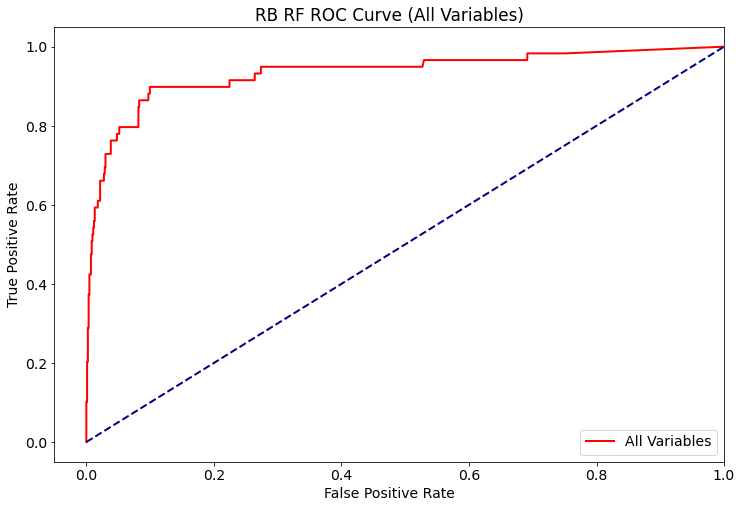

In [101]:
fpr_rfc_1, tpr_rfc_1, _ = roc_curve(test_rfc_y1_2, rfc_prob1[:,1])
plt.plot(fpr_rfc_1,tpr_rfc_1, color ='red', lw=2, label="All Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RB RF ROC Curve (All Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\RBs\ROC_all.jpg'), bbox_inches='tight')

## Running Back Random Forest (Rushing Variables) [2]

In [102]:
rb_df_features2 = rb_df.iloc[:,8:]
rb_df_features2 = rb_df_features2.drop(['Player*','Year','PlayerYearTm*','Pos*'], axis=1)
rb_df_features2 = rb_df_features2[rb_df_features2.columns.drop(list(rb_df.filter(regex='Pass')))]
rb_df_features2 = rb_df_features2[rb_df_features2.columns.drop(list(rb_df.filter(regex='Rec')))]
print(rb_df_features2.columns)
rb_df_features2.head()

Index(['GS', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Rush_Fmb', 'QBrec', 'probowl'],
      dtype='object')


,GS,Rush_Att,Rush_Yds,Rush_TD,Rush_1D,Rush_Lng,Rush_Y/A,Rush_Y/G,Rush_Fmb,QBrec,probowl
0,16,403,1509,14,78,35,3.7,94.3,5,0,1
1,16,387,1709,13,100,30,4.4,106.8,5,0,1
2,16,355,1341,8,72,30,3.8,83.8,1,0,0
3,16,339,1184,10,66,34,3.5,74.0,4,0,0
4,15,332,1318,11,72,50,4.0,87.9,4,0,1


In [103]:
rb_df_features2.dtypes

GS            int64
Rush_Att      int64
Rush_Yds      int64
Rush_TD       int64
Rush_1D       int64
Rush_Lng      int64
Rush_Y/A    float64
Rush_Y/G    float64
Rush_Fmb      int64
QBrec         int64
probowl       int64
dtype: object

In [104]:
train2, test2 = train_test_split(rb_df_features2, test_size=0.333, stratify=rb_df_features2['probowl'])

In [105]:
train_y2 = train2['probowl']
train_x2=train2.drop(columns=['probowl'])
test_y2=test2['probowl']
test_x2=test2.drop(columns=['probowl'])

In [106]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [60,70,80,90,100],
    'max_features': [2,3,4],
    'min_samples_leaf': [9,11,13],
    'min_samples_split': [11,12,13],
    'n_estimators': [100,110,120,130]
}
rf = RandomForestClassifier()
grid_search2 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [107]:
# Fit the grid search to the data
grid_search2.fit(train_x2, train_y2)

Fitting 5 folds for each of 540 candidates, totalling 2700 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True],
                         'max_depth': [60, 70, 80, 90, 100],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [9, 11, 13],
                         'min_samples_split': [11, 12, 13],
                         'n_estimators': [100, 110, 120, 130]},
             verbose=2)

In [108]:
grid_search2.best_params_

{'bootstrap': True,
 'max_depth': 60,
 'max_features': 3,
 'min_samples_leaf': 11,
 'min_samples_split': 12,
 'n_estimators': 110}

In [109]:
rf_mod2 = grid_search2.best_estimator_
print(rf_mod2)
rfc_pred2 = rf_mod2.predict(test_x2)

RandomForestClassifier(max_depth=60, max_features=3, min_samples_leaf=11,
                       min_samples_split=12, n_estimators=110)


In [110]:
print(confusion_matrix(test_y2,rfc_pred2))

[[827   6]
 [ 25  34]]


In [111]:
print(classification_report(test_y2, rfc_pred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       833
           1       0.85      0.58      0.69        59

    accuracy                           0.97       892
   macro avg       0.91      0.78      0.83       892
weighted avg       0.96      0.97      0.96       892



In [112]:
rfc_prob2 = rf_mod2.predict_proba(test_x2)

In [113]:
test_rfc_y2_2 = test_y2.to_numpy()
roc_auc_score(test_rfc_y2_2, rfc_prob2[:,1])

0.9298838179339534

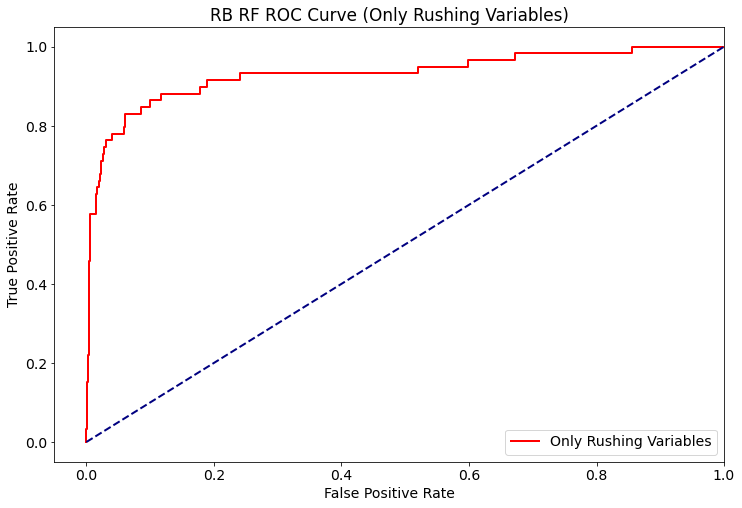

In [114]:
fpr_rfc_2, tpr_rfc_2, _ = roc_curve(test_rfc_y2_2, rfc_prob2[:,1])
plt.plot(fpr_rfc_2,tpr_rfc_2, color ='red', lw=2, label="Only Rushing Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RB RF ROC Curve (Only Rushing Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\RBs\ROC_Rushing.jpg'), bbox_inches='tight')

## Visualize feature importance for all variables

In [115]:
print(type(rf_mod1.feature_importances_))
print(len(rf_mod1.feature_importances_))
rf_mod1.feature_importances_

<class 'numpy.ndarray'>
45


array([1.57778102e-02, 8.10679963e-02, 2.58778493e-01, 6.93497397e-02,
       1.31970055e-01, 1.34511857e-02, 3.21199962e-02, 2.06945590e-01,
       1.06923380e-02, 9.77630276e-03, 2.00205099e-02, 1.48129638e-02,
       2.77863181e-02, 1.08829376e-02, 5.62173143e-03, 2.56146065e-02,
       1.24004781e-02, 1.29355226e-02, 1.46177137e-02, 1.33598073e-02,
       8.20655348e-03, 1.27217587e-04, 4.28625040e-04, 6.08164249e-05,
       3.11476930e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.52286114e-04, 5.40416204e-04,
       0.00000000e+00, 1.68041166e-05, 5.16160342e-04, 1.42452728e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       2.33020195e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [116]:
feat = rb_df_features.columns.to_list()
arr = np.array(feat)
print(len(arr))

46


In [117]:
arr

array(['GS', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Rush_Fmb', 'Rec_Tgt', 'Rec_Rec',
       'Rec_Ctch%', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD', 'Rec_1D', 'Rec_Lng',
       'Rec_Y/Tgt', 'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb', 'Pass_Cmp',
       'Pass_Att', 'Pass_Cmp%', 'Pass_Yds', 'Pass_TD', 'Pass_TD%',
       'Pass_Int', 'Pass_Int%', 'Pass_1D', 'Pass_Lng', 'Pass_Y/A',
       'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G', 'Pass_Rate', 'Pass_QBR',
       'Pass_Sk', 'Pass_Yds.1', 'Pass_Sk%', 'Pass_NY/A', 'Pass_ANY/A',
       'Pass_4QC', 'Pass_GWD', 'QBrec', 'probowl'], dtype='<U10')

In [118]:
#Drop probowl column 
arr = arr[0:45]
print(len(arr))

45


**Sort Feature Importance**

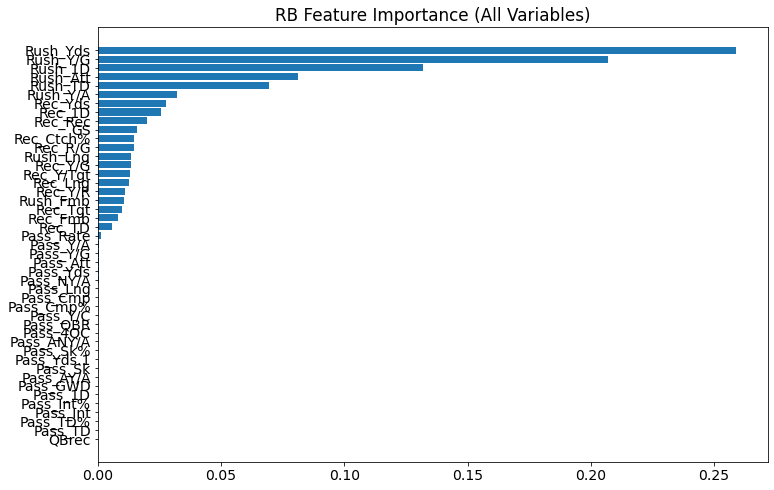

In [119]:
sorted_idx = rf_mod1.feature_importances_.argsort()
plt.barh(arr[sorted_idx], rf_mod1.feature_importances_[sorted_idx])
plt.title('RB Feature Importance (All Variables)')

plt.savefig(os.path.join(path_parent, 'Figures\RBs\FeatureImportance_All.jpg'), bbox_inches='tight')

## Visualize feature importance for only receiving variables

In [120]:
print(type(rf_mod2.feature_importances_))
print(len(rf_mod2.feature_importances_))
rf_mod2.feature_importances_

<class 'numpy.ndarray'>
10


array([0.06250129, 0.07956236, 0.31073931, 0.08848926, 0.16888632,
       0.01736386, 0.05586298, 0.20586354, 0.01073109, 0.        ])

In [121]:
feat = rb_df_features2.columns.to_list()
arr2 = np.array(feat)

In [122]:
arr

array(['GS', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Rush_Fmb', 'Rec_Tgt', 'Rec_Rec',
       'Rec_Ctch%', 'Rec_Yds', 'Rec_Y/R', 'Rec_TD', 'Rec_1D', 'Rec_Lng',
       'Rec_Y/Tgt', 'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb', 'Pass_Cmp',
       'Pass_Att', 'Pass_Cmp%', 'Pass_Yds', 'Pass_TD', 'Pass_TD%',
       'Pass_Int', 'Pass_Int%', 'Pass_1D', 'Pass_Lng', 'Pass_Y/A',
       'Pass_AY/A', 'Pass_Y/C', 'Pass_Y/G', 'Pass_Rate', 'Pass_QBR',
       'Pass_Sk', 'Pass_Yds.1', 'Pass_Sk%', 'Pass_NY/A', 'Pass_ANY/A',
       'Pass_4QC', 'Pass_GWD', 'QBrec'], dtype='<U10')

In [123]:
#Drop probowl column
arr2=arr2[0:10]
print(len(arr2))

10


Sort the feature importance

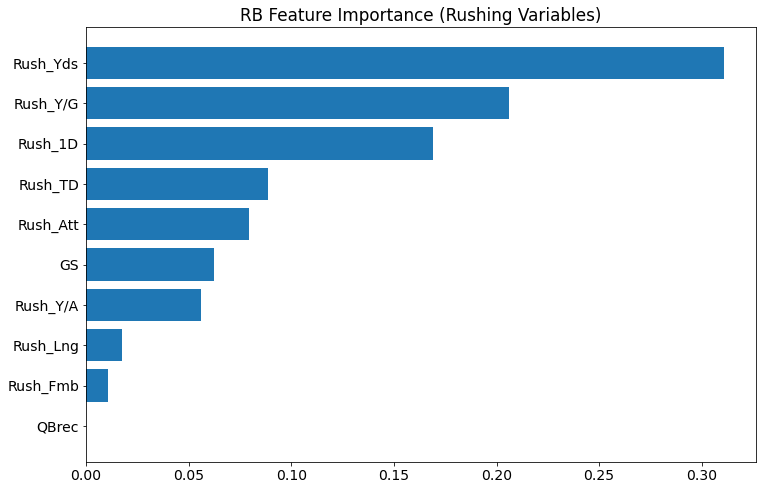

In [124]:
sorted_idx = rf_mod2.feature_importances_.argsort()
plt.barh(arr2[sorted_idx], rf_mod2.feature_importances_[sorted_idx])
plt.title('RB Feature Importance (Rushing Variables)')

plt.savefig(os.path.join(path_parent, 'Figures\RBs\FeatureImportance_Rushing.jpg'), bbox_inches='tight')

## RF Model with only the top 5 Receiving variables [3]

In [125]:
top_rb_features = rb_df[['Rush_Yds','Rush_Y/G','Rush_1D','Rush_Att','GS','probowl']]
top_rb_features.head()

,Rush_Yds,Rush_Y/G,Rush_1D,Rush_Att,GS,probowl
0,1509,94.3,78,403,16,1
1,1709,106.8,100,387,16,1
2,1341,83.8,72,355,16,0
3,1184,74.0,66,339,16,0
4,1318,87.9,72,332,15,1


In [126]:
train3, test3 = train_test_split(top_rb_features, test_size=0.333, stratify=top_rb_features['probowl'])
train_y3 = train3['probowl']
train_x3=train3.drop(columns=['probowl'])
test_y3=test3['probowl']
test_x3=test3.drop(columns=['probowl'])

In [127]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [60,70,80,90],
    'max_features': [3,4,5,6],
    'min_samples_leaf': [4,5,6,7],
    'min_samples_split': [10,11,12,13,14],
    'n_estimators': [70,80,90,100]
}
rf = RandomForestClassifier()
grid_search3 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [128]:
# Fit the grid search to the data
grid_search3.fit(train_x3, train_y3)

Fitting 5 folds for each of 1280 candidates, totalling 6400 fits


C:\Users\andre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
1600 fits failed out of a total of 6400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1600 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\andre\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 450, in fit
    trees = Parallel(
  File "C:\Users\andre\anaconda3\lib\site-packages\joblib\parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\andre\anaconda3\lib\site-packa

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [60, 70, 80, 90],
                         'max_features': [3, 4, 5, 6],
                         'min_samples_leaf': [4, 5, 6, 7],
                         'min_samples_split': [10, 11, 12, 13, 14],
                         'n_estimators': [70, 80, 90, 100]},
             verbose=2)

In [129]:
grid_search3.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 5,
 'min_samples_leaf': 5,
 'min_samples_split': 12,
 'n_estimators': 70}

In [130]:
rf_mod3 = grid_search3.best_estimator_
print(rf_mod3)
rfc_pred3 = rf_mod3.predict(test_x3)

RandomForestClassifier(max_depth=80, max_features=5, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=70)


In [131]:
print(confusion_matrix(test_y3,rfc_pred3))

[[820  13]
 [ 28  31]]


In [132]:
print(classification_report(test_y3, rfc_pred3))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       833
           1       0.70      0.53      0.60        59

    accuracy                           0.95       892
   macro avg       0.84      0.75      0.79       892
weighted avg       0.95      0.95      0.95       892



In [133]:
rfc_prob3 = rf_mod3.predict_proba(test_x3)

In [134]:
test_rfc_y3_2 = test_y3.to_numpy()
roc_auc_score(test_rfc_y3_2, rfc_prob3[:,1])

0.9018353103953446

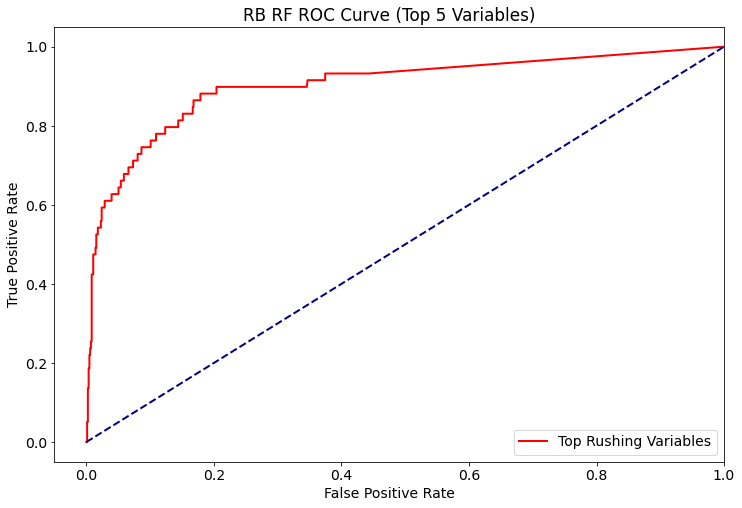

In [135]:
fpr_rfc_3, tpr_rfc_3, _ = roc_curve(test_rfc_y3_2, rfc_prob3[:,1])
plt.plot(fpr_rfc_3,tpr_rfc_3, color ='red', lw=2, label="Top Rushing Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RB RF ROC Curve (Top 5 Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\RBs\ROC_Top5Rushing.jpg'), bbox_inches='tight')

## RF Model with Rushing and Receiving variables [3]

In [136]:
wr_rb_df_features = rb_df.iloc[:,8:]
wr_rb_df_features = wr_rb_df_features.drop(['Player*','Year','PlayerYearTm*','Pos*'], axis=1)
wr_rb_df_features = wr_rb_df_features[wr_rb_df_features.columns.drop(list(rb_df.filter(regex='Pass')))]
print(wr_rb_df_features.columns)
wr_rb_df_features.head()

Index(['GS', 'Rush_Att', 'Rush_Yds', 'Rush_TD', 'Rush_1D', 'Rush_Lng',
       'Rush_Y/A', 'Rush_Y/G', 'Rush_Fmb', 'Rec_Tgt', 'Rec_Rec', 'Rec_Ctch%',
       'Rec_Yds', 'Rec_Y/R', 'Rec_TD', 'Rec_1D', 'Rec_Lng', 'Rec_Y/Tgt',
       'Rec_R/G', 'Rec_Y/G', 'Rec_Fmb', 'QBrec', 'probowl'],
      dtype='object')


,GS,Rush_Att,Rush_Yds,Rush_TD,Rush_1D,Rush_Lng,Rush_Y/A,Rush_Y/G,Rush_Fmb,Rec_Tgt,...,Rec_Y/R,Rec_TD,Rec_1D,Rec_Lng,Rec_Y/Tgt,Rec_R/G,Rec_Y/G,Rec_Fmb,QBrec,probowl
0,16,403,1509,14,78,35,3.7,94.3,5,65,...,9.1,2,23,24,7.0,3.1,28.3,5,0,1
1,16,387,1709,13,100,30,4.4,106.8,5,87,...,9.4,5,24,60,6.8,3.9,37.1,5,0,1
2,16,355,1341,8,72,30,3.8,83.8,1,19,...,7.5,0,5,25,5.1,0.8,6.1,1,0,0
3,16,339,1184,10,66,34,3.5,74.0,4,48,...,9.0,1,15,32,6.0,2.0,17.9,4,0,0
4,15,332,1318,11,72,50,4.0,87.9,4,49,...,9.5,0,12,39,6.4,2.2,20.9,4,0,1


In [137]:
train4, test4 = train_test_split(wr_rb_df_features, test_size=0.333, stratify=wr_rb_df_features['probowl'])
train_y4 = train3['probowl']
train_x4=train3.drop(columns=['probowl'])
test_y4=test3['probowl']
test_x4=test3.drop(columns=['probowl'])

In [138]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [45,60,70],
    'max_features': [3,4,5],
    'min_samples_leaf': [6,7,8],
    'min_samples_split': [9,10,11,12],
    'n_estimators': [70,80,90,100]
}
rf = RandomForestClassifier()
grid_search4 = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1, verbose = 2)

In [139]:
# Fit the grid search to the data
grid_search4.fit(train_x4, train_y4)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [45, 60, 70],
                         'max_features': [3, 4, 5],
                         'min_samples_leaf': [6, 7, 8],
                         'min_samples_split': [9, 10, 11, 12],
                         'n_estimators': [70, 80, 90, 100]},
             verbose=2)

In [140]:
grid_search4.best_params_

{'bootstrap': True,
 'max_depth': 45,
 'max_features': 5,
 'min_samples_leaf': 7,
 'min_samples_split': 10,
 'n_estimators': 70}

In [141]:
rf_mod4 = grid_search3.best_estimator_
print(rf_mod4)
rfc_pred4 = rf_mod3.predict(test_x4)

RandomForestClassifier(max_depth=80, max_features=5, min_samples_leaf=5,
                       min_samples_split=12, n_estimators=70)


In [142]:
print(confusion_matrix(test_y4,rfc_pred4))

[[820  13]
 [ 28  31]]


In [143]:
print(classification_report(test_y4, rfc_pred4))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       833
           1       0.70      0.53      0.60        59

    accuracy                           0.95       892
   macro avg       0.84      0.75      0.79       892
weighted avg       0.95      0.95      0.95       892



In [144]:
rfc_prob4 = rf_mod3.predict_proba(test_x4)

In [145]:
test_rfc_y4_2 = test_y4.to_numpy()
roc_auc_score(test_rfc_y4_2, rfc_prob4[:,1])

0.9018353103953446

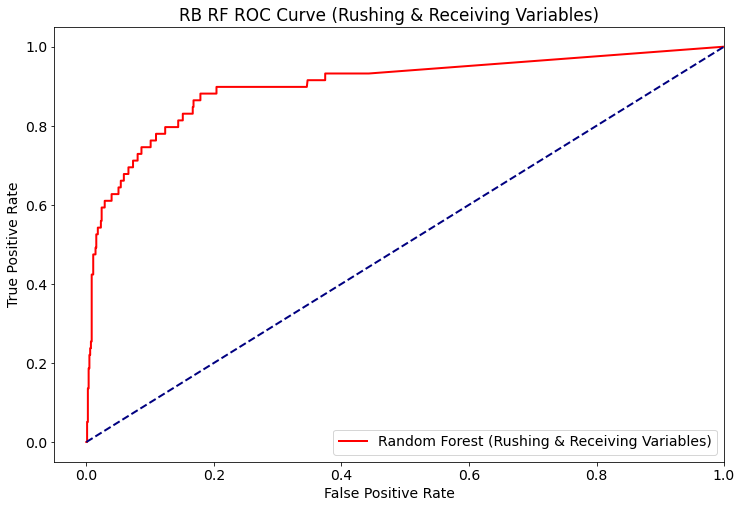

In [146]:
fpr_rfc_4, tpr_rfc_4, _ = roc_curve(test_rfc_y4_2, rfc_prob4[:,1])
plt.plot(fpr_rfc_4,tpr_rfc_4, color ='red', lw=2, label="Random Forest (Rushing & Receiving Variables)")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RB RF ROC Curve (Rushing & Receiving Variables)')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\RBs\ROC_Rush&Rec.jpg'), bbox_inches='tight')

## Plot all 4 ROC Curves together

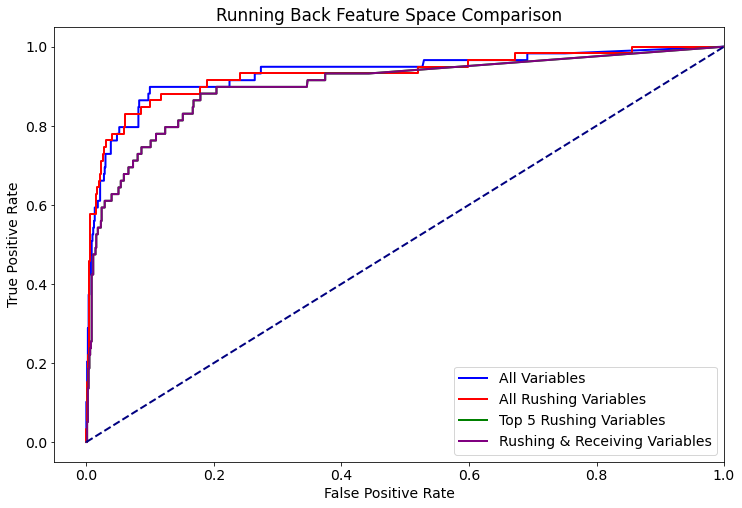

In [147]:
plt.plot(fpr_rfc_1,tpr_rfc_1, color ='blue', lw=2, label="All Variables")
plt.plot(fpr_rfc_2,tpr_rfc_2, color ='red', lw=2, label="All Rushing Variables")
plt.plot(fpr_rfc_3,tpr_rfc_3, color ='green', lw=2, label="Top 5 Rushing Variables")
plt.plot(fpr_rfc_4,tpr_rfc_4, color ='purple', lw=2, label="Rushing & Receiving Variables")
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([-.05, 1.0])
plt.ylim([-.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Running Back Feature Space Comparison')
plt.legend(loc="lower right")
# plt.show()
plt.savefig(os.path.join(path_parent, 'Figures\RBs\RB_ROC_Comparison.jpg'), bbox_inches='tight')

In [148]:
print('ALL VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y1,rfc_pred1))
print("\n Classification Report: ")
print(classification_report(test_y1, rfc_pred1))

ALL VARIABLES: 

Confusion Matrix:
[[824   9]
 [ 27  32]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       833
           1       0.78      0.54      0.64        59

    accuracy                           0.96       892
   macro avg       0.87      0.77      0.81       892
weighted avg       0.96      0.96      0.96       892



In [149]:
print('ONLY RUSHING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y2,rfc_pred2))
print("\n Classification Report: ")
print(classification_report(test_y2, rfc_pred2))

ONLY RUSHING VARIABLES: 

Confusion Matrix:
[[827   6]
 [ 25  34]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       833
           1       0.85      0.58      0.69        59

    accuracy                           0.97       892
   macro avg       0.91      0.78      0.83       892
weighted avg       0.96      0.97      0.96       892



In [150]:
print('TOP 5 RUSHING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y3,rfc_pred3))
print("\n Classification Report: ")
print(classification_report(test_y3, rfc_pred3))

TOP 5 RUSHING VARIABLES: 

Confusion Matrix:
[[820  13]
 [ 28  31]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       833
           1       0.70      0.53      0.60        59

    accuracy                           0.95       892
   macro avg       0.84      0.75      0.79       892
weighted avg       0.95      0.95      0.95       892



In [151]:
print('RUSHING & RECEIVING VARIABLES: \n')
print("Confusion Matrix:")
print(confusion_matrix(test_y4,rfc_pred4))
print("\n Classification Report: ")
print(classification_report(test_y4, rfc_pred4))

RUSHING & RECEIVING VARIABLES: 

Confusion Matrix:
[[820  13]
 [ 28  31]]

 Classification Report: 
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       833
           1       0.70      0.53      0.60        59

    accuracy                           0.95       892
   macro avg       0.84      0.75      0.79       892
weighted avg       0.95      0.95      0.95       892



**All 4 random forest models result in an F1-Score of 0.98 for identifying non-Pro-Bowl players**

The highest F1-Score for identifying Pro-Bowl players (0.69) is from the model that only uses rushing variables.

The Models that use the top 5 rushing variables and all rushing and receiving variables have the next highest F1-Score of 0.67, and have the same precision and recall values (0.86 and 0.54, respectively).

The worst F1-score came from the random forest model that used all 46 input variables (0.65)